In [1]:
# package imports
import pandas as pd
import numpy as np
import plotly.express as pe
from pathlib import Path
import sys
import plotly.graph_objects as go
import os
import seaborn as sns
import LESO.defaultvalues as defs
import matplotlib.pyplot as plt
from LESO.experiments.analysis import (
    load_ema_leso_results,
    open_leso_experiment_file,
    quick_lcoe,
    annualized_cost
)

C:\Users\Sethv\#Universiteit Twente\GIT\.venvLESO\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\Sethv\#Universiteit Twente\GIT\.venvLESO\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


# Folder rooting & defaults

In [2]:
# variables
exp_prefix = "evhub"
run_id = 210907

# rooting
FOLDER = Path(os.path.abspath(''))
RESULT_FOLDER = FOLDER.parent / "results"
sys.path.append(FOLDER.parent.absolute().__str__())

# constants
wind_capex = defs.wind['capex']
pv_capex = defs.pv['capex']
bat_capex = 0.4055 # TODO this is an approximation, since it is not strictly linear due to storage/power components
wind_col = "Nordex N100 2500 installed capacity"
pv_col = "PV South installed capacity"
bat_col = "2h battery installed capacity"

# Extracting data from database and adding relevant coloumns

In [8]:
# extract data
experiments, outcomes, df = load_ema_leso_results(run_id=run_id, exp_prefix=exp_prefix, results_folder=RESULT_FOLDER)
exp = open_leso_experiment_file(RESULT_FOLDER / df.filename_export[0])

# use for defining cols
for c in df.columns:
    print(c)
df.max()

# add cols of interest
df["total_re_capacity"] = df[[wind_col,pv_col]].sum(axis=1)
df["Grid capacity"] = df['grid_capacity'].apply(lambda x : str(x))

# show df
df

PV South soundwall installed capacity
PV South installed capacity
PV West installed capacity
PV East installed capacity
Nordex N100 2500 installed capacity
Charging demand installed capacity
2h battery installed capacity
6h battery installed capacity
10h battery installed capacity
Grid connection installed capacity
objective_result
additional_renewable_energy
curtailment
return_on_investment
net_profit
additional_investment_cost
battery_cost_factor
pv_cost_factor
wind_cost_factor
grid_capacity
filename_export
solving_time
solver_status
solver_status_code


,PV South soundwall installed capacity,PV South installed capacity,PV West installed capacity,PV East installed capacity,Nordex N100 2500 installed capacity,Charging demand installed capacity,2h battery installed capacity,6h battery installed capacity,10h battery installed capacity,Grid connection installed capacity,...,battery_cost_factor,pv_cost_factor,wind_cost_factor,grid_capacity,filename_export,solving_time,solver_status,solver_status_code,total_re_capacity,Grid capacity
0,0.000000,15.884143,0.0,0.0,3.259942,20.0,16.117723,0.000000,0.000000,0.5,...,0.644083,0.469872,0.827264,0.5,evhub_exp_777780.json,15.280604,ok,0,19.144085,0.5
2,0.000000,10.226588,0.0,0.0,3.483933,20.0,19.414028,0.000000,0.000000,0.5,...,0.418631,0.488812,0.963015,0.5,evhub_exp_730098.json,21.506376,ok,0,13.710521,0.5
3,0.000000,10.226588,0.0,0.0,3.483933,20.0,19.414028,0.000000,0.000000,0.5,...,0.679636,0.651670,0.778868,0.5,evhub_exp_259791.json,20.375278,ok,0,13.710521,0.5
4,0.025868,10.197474,0.0,0.0,3.484256,20.0,19.416781,0.000000,0.000000,0.5,...,0.478061,0.811394,0.787543,0.5,evhub_exp_102686.json,18.549017,ok,0,13.681730,0.5
5,0.000000,19.570988,0.0,0.0,3.115575,20.0,14.076681,0.000000,0.000000,0.5,...,0.560635,0.423367,0.957718,0.5,evhub_exp_156212.json,19.139893,ok,0,22.686563,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,6.820177,0.0,0.0,0.834390,20.0,3.961189,0.000000,0.000000,1.5,...,0.432240,0.527616,0.873394,1.5,evhub_exp_537943.json,14.988340,ok,0,7.654567,1.5
596,0.000000,7.229379,0.0,0.0,1.555761,20.0,2.524534,0.005781,0.002421,1.5,...,0.641583,0.464155,0.941362,1.5,evhub_exp_185581.json,16.551182,ok,0,8.785140,1.5
597,0.000000,6.753761,0.0,0.0,1.459769,20.0,2.785297,0.000000,0.000000,1.5,...,0.648096,0.573040,0.898404,1.5,evhub_exp_124350.json,13.525833,ok,0,8.213529,1.5
598,0.000000,7.236231,0.0,0.0,1.557232,20.0,2.528902,0.000000,0.000000,1.5,...,0.647788,0.475380,0.919266,1.5,evhub_exp_227895.json,18.103114,ok,0,8.793463,1.5


# KDE and scatterplot for installed capacity vs. cost factor

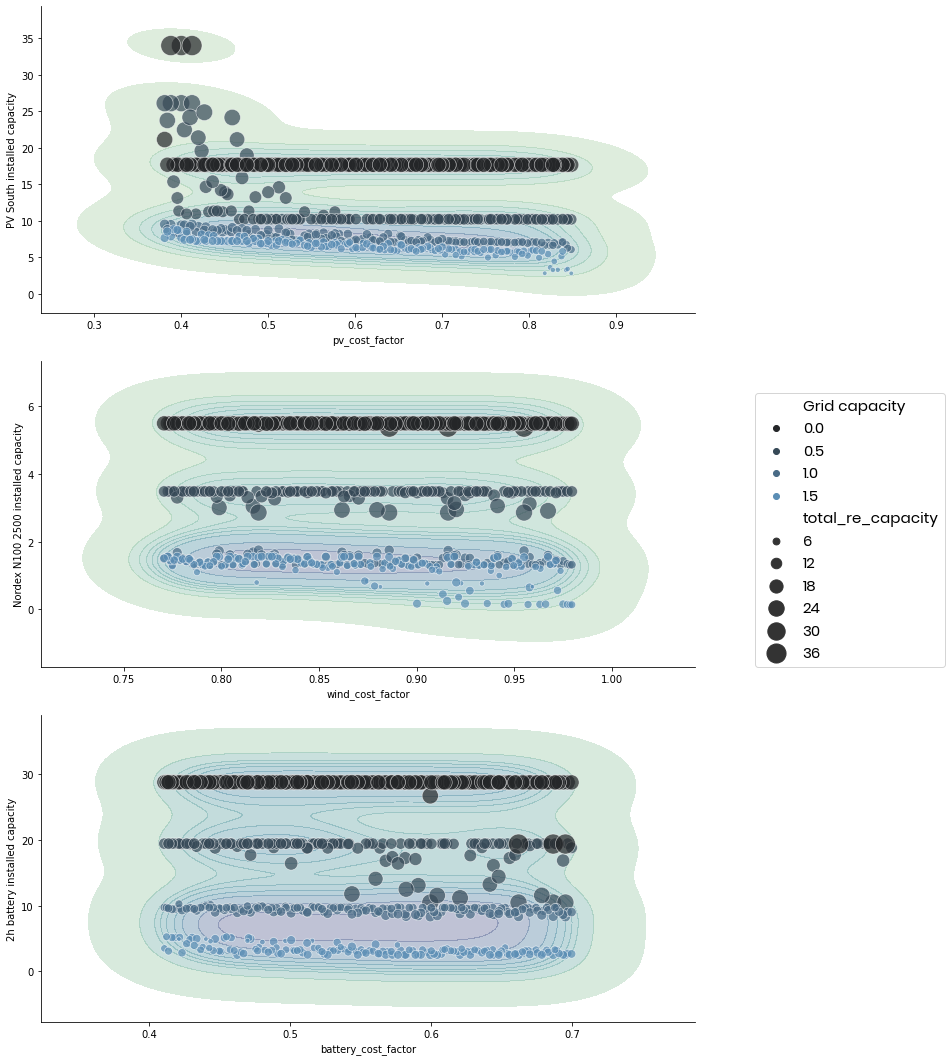

In [4]:
# KDE scatters
fig, axi = plt.subplots(3, 1, figsize=(10, 15))
rc = {
    'font.family':'Poppins',
    'font.size' : 15,
    }
plt.rcParams.update(rc)
hue_order = [str(x) for x in df.grid_capacity.sort_values().unique()]

def scatter_kde(x, y, ax, hue="Grid capacity", size="total_re_capacity"):
    sns.kdeplot(
        data=df,
        x=x,
        y=y,
        fill=True,
        levels=10,
        thresh=0.01,
        cmap="crest",
        alpha=0.3,
        ax=ax,
    )
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        hue_order=hue_order,
        ax=ax,
        size=size,
        alpha=0.7,
        palette="dark:#5b8eb5",
        sizes=(20, 400),
        legend="brief",
    )
    ax.get_legend().remove()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


# PV
scatter_kde(x="pv_cost_factor", y=pv_col, ax=axi[0])
# wind
scatter_kde(x="wind_cost_factor", y=wind_col, ax=axi[1])
# battery
scatter_kde(x="battery_cost_factor", y=bat_col, ax=axi[2])
# fix the legends
handles, labels = axi[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=[1.05, 0.5])
fig.tight_layout()
# fig.subplots_adjust()


# Installed capacity vs. cost factor at every interconnection level


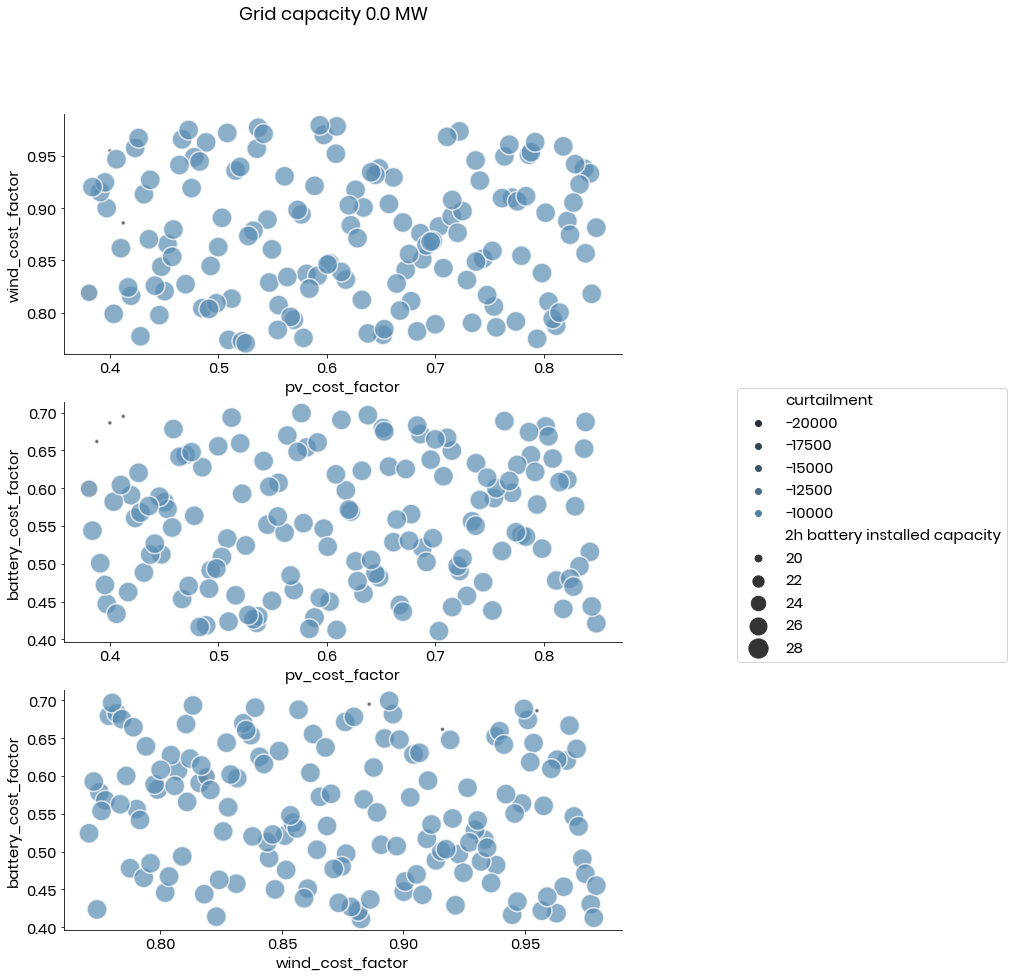

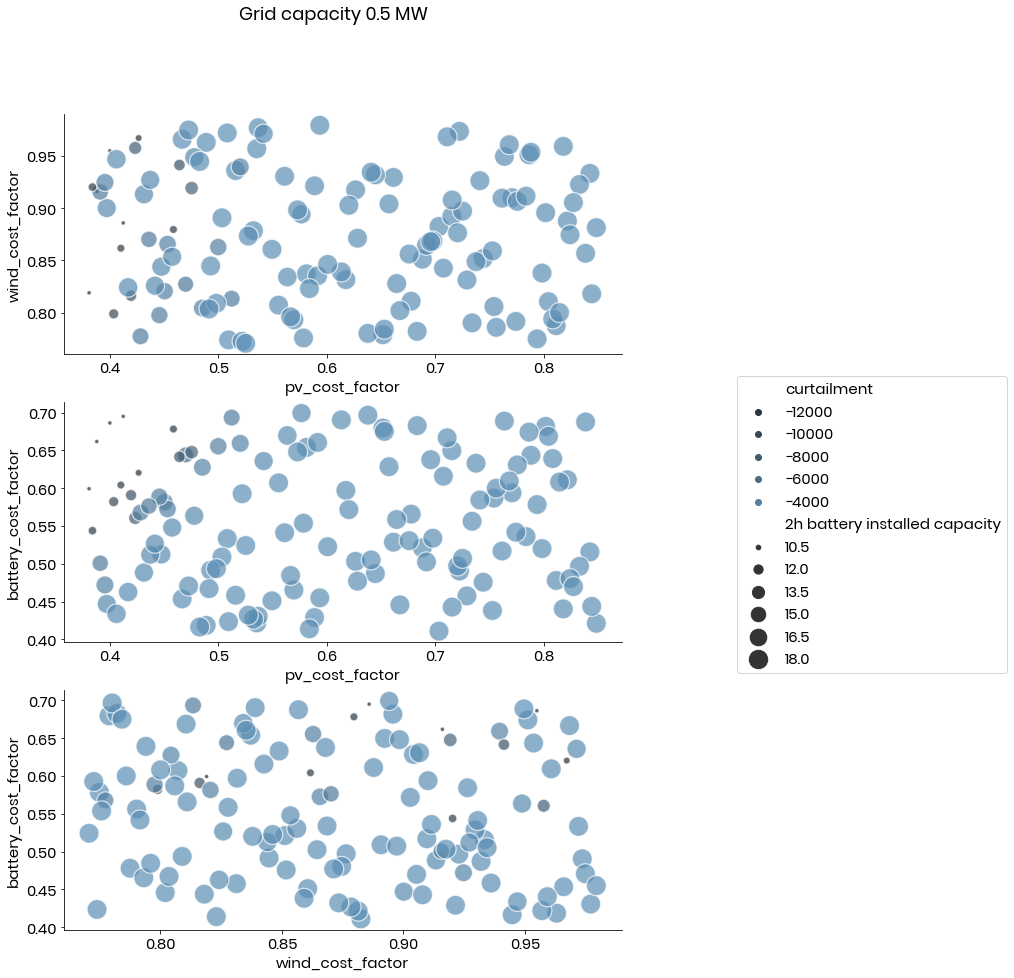

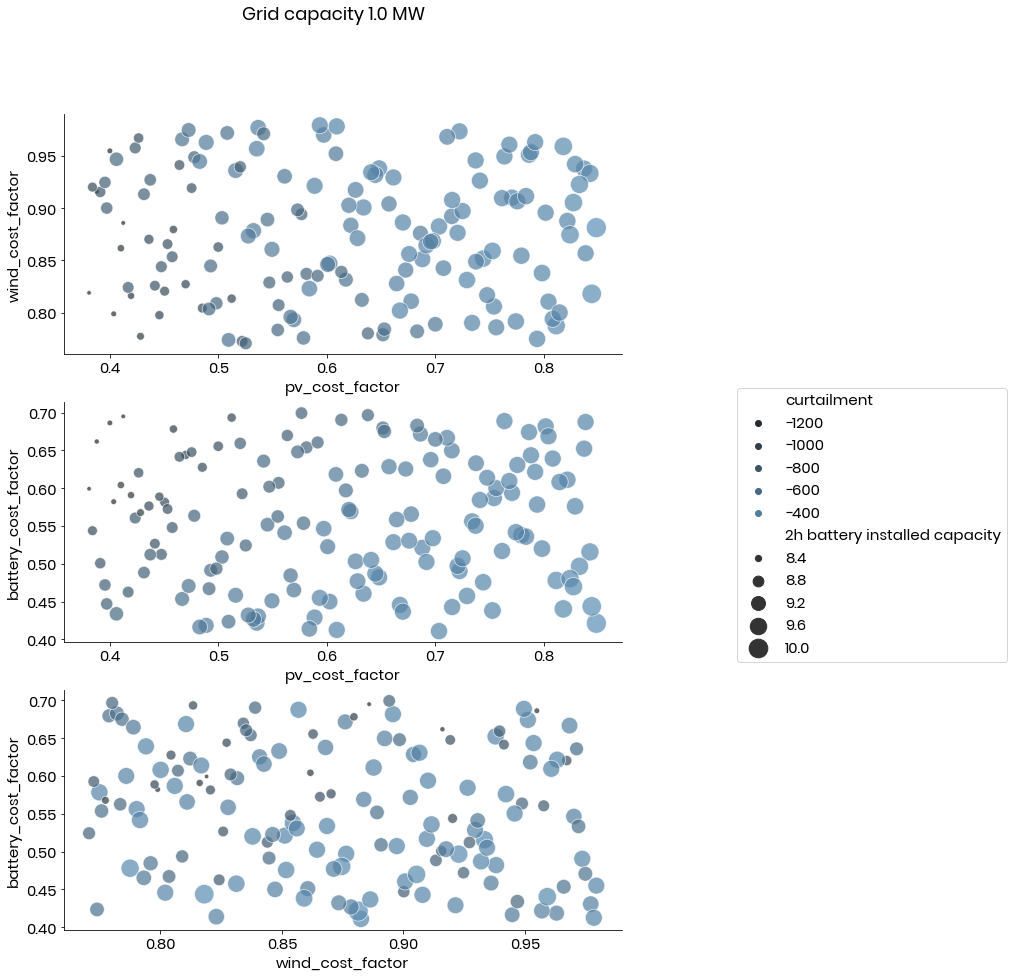

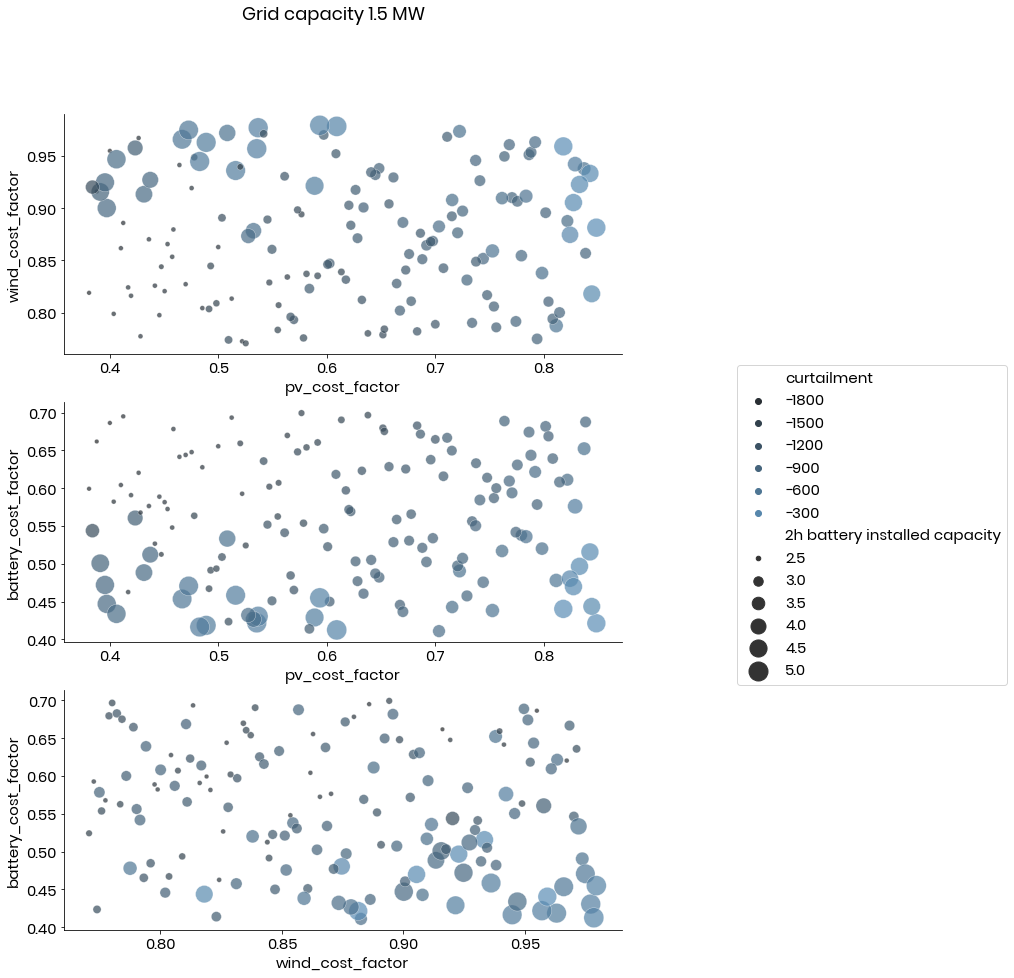

In [10]:
def scatterplot(df, x, y, ax, hue="curtailment", size=bat_col, hue_order=None):
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        hue_order=hue_order,
        ax=ax,
        size=size,
        alpha=0.7,
        palette="dark:#5b8eb5",
        sizes=(20, 400),
        legend="brief",
    )
    ax.get_legend().remove()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for grid_cap in hue_order:
    fig, axi = plt.subplots(3, 1, figsize=(10, 15))
    df2 = df[df.grid_capacity== float(grid_cap)]
    # PV vs. Wind
    scatterplot(
        df=df2,
        x="pv_cost_factor",
        y="wind_cost_factor",
        ax=axi[0]
    )
    # PV vs. Bat
    scatterplot(
        df=df2,
        x="pv_cost_factor",
        y="battery_cost_factor",
        ax=axi[1]
    )
    # Wind vs. Bat
    scatterplot(
        df=df2,
        x="wind_cost_factor",
        y="battery_cost_factor",
        ax=axi[2]
    )
    handles, labels = axi[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="center left", bbox_to_anchor=[1.05, 0.5])
    fig.suptitle(f"Grid capacity {grid_cap} MW")

# Capacities vs. cost price per component
### > Without the KDE plot
### > Cost factor translated to price per capacity (€/W(h))

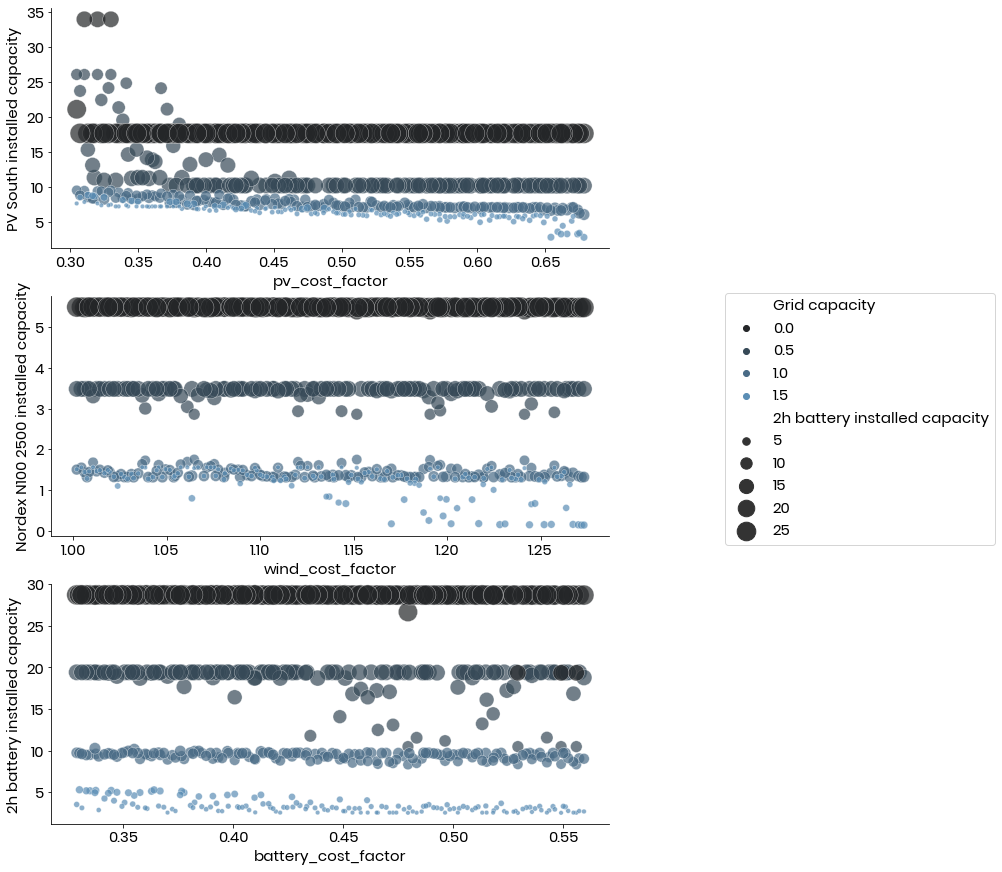

In [6]:
fig, axi = plt.subplots(3, 1, figsize=(10, 15))
    
## PV
scatterplot( 
    df=df,
    x=df["pv_cost_factor"]*pv_capex,
    y=pv_col,
    ax=axi[0],
    hue="Grid capacity",
    hue_order=hue_order,
)

## Wind
scatterplot(
    df=df, 
    x=df["wind_cost_factor"]*wind_capex,
    y=wind_col,
    ax=axi[1],
    hue="Grid capacity",
    hue_order=hue_order,
)
## Battery
scatterplot(
    df=df, 
    x=df["battery_cost_factor"]*pv_capex,
    y=bat_col,
    ax=axi[2],
    hue="Grid capacity",
    hue_order=hue_order,
)

handles, labels = axi[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=[1.05, 0.5])


# Installed capacity pair plots ; discover synergies?

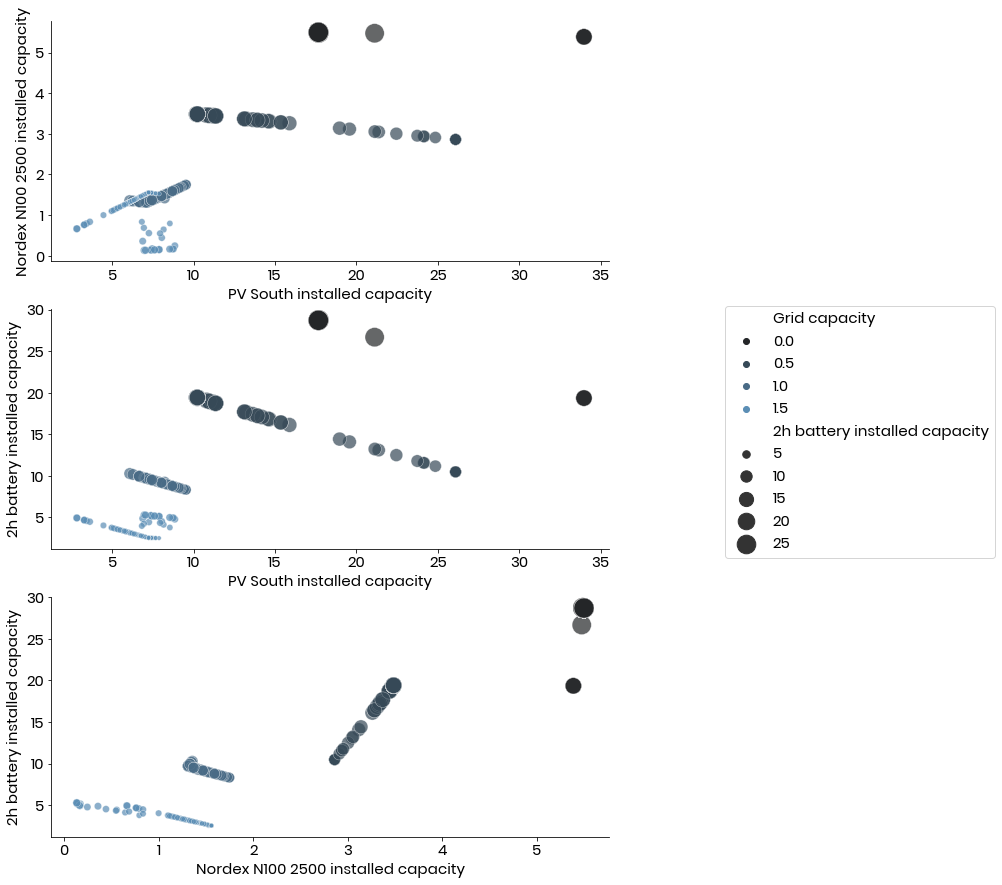

In [7]:
fig, axi = plt.subplots(3, 1, figsize=(10, 15))
    
## PV vs. Wind
scatterplot( 
    df=df,
    x=pv_col,
    y=wind_col,
    ax=axi[0],
    hue="Grid capacity",
    hue_order=hue_order,
)

## PV vs. bat
scatterplot(
    df=df, 
    x=pv_col,
    y=bat_col,
    ax=axi[1],
    hue="Grid capacity",
    hue_order=hue_order,
)
## Wind vs. battery
scatterplot(
    df=df, 
    x=wind_col,
    y=bat_col,
    ax=axi[2],
    hue="Grid capacity",
    hue_order=hue_order,
)

handles, labels = axi[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=[1.05, 0.5])